# VeloCliff



A project analyzing MLB pitcher performance thresholds, focusing on metrics like xwOBA to pinpoint when pitchers start to struggle, using Statcast data. This analysis can help identify early signs of fatigue or performance decline.

In [28]:
import sys
sys.path.append("../utils")

from PlayerLookup import player_lookup

from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [29]:
pitcher_lookup = playerid_lookup('flaherty', 'jack')
pitcher_lookup

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,flaherty,jack,656427,flahj002,flaheja01,17479,2017.0,2024.0


In [30]:
print(pitcher_lookup['key_mlbam'].iloc[0])

656427


In [31]:
# Extract only the year from the date strings
start_year = int('2024-02-15'.split('-')[0])  # 2024
end_year = int('2024-11-15'.split('-')[0])    # 2024

# pitcher_data = player_lookup(pitcher_lookup['key_mlbam'].iloc[0], start_year, end_year)
# pitcher_data.groupby("pitch_type").release_speed.agg("mean")

# player_id = pitcher_lookup['key_mlbam'].iloc[0]
# start_year = 2024
# end_year = 2024

pitcher_data = player_lookup(pitcher_lookup['key_mlbam'].iloc[0], start_year, end_year)
pitcher_data

,at_bat_number,away_score,away_team,ax,ay,az,babip_value,balls,bat_score,bat_speed,...,type,umpire,vx0,vy0,vz0,woba_denom,woba_value,zone,batter_name,pitcher_name
0,15,0,LAD,4.500263,26.199035,-30.467545,1.0,3,3,67.4,...,X,NaN,5.528168,-125.049176,-2.813728,1.0,0.9,8,Alex Verdugo,Jack Flaherty
1,15,0,LAD,-9.523435,32.240131,-13.574842,NaN,3,3,NaN,...,S,NaN,5.954054,-136.019164,-7.074140,NaN,NaN,7,Alex Verdugo,Jack Flaherty
2,15,0,LAD,5.804972,26.082061,-31.842322,NaN,2,3,NaN,...,B,NaN,1.263647,-122.767484,0.291623,NaN,NaN,11,Alex Verdugo,Jack Flaherty
3,15,0,LAD,4.645023,23.286931,-39.961677,NaN,1,3,NaN,...,B,NaN,5.917062,-115.744533,-1.725193,NaN,NaN,14,Alex Verdugo,Jack Flaherty
4,15,0,LAD,-9.553635,28.232614,-14.559931,NaN,0,3,NaN,...,B,NaN,8.136952,-134.759938,-7.837047,NaN,NaN,14,Alex Verdugo,Jack Flaherty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2,0,PHI,-6.132704,28.739867,-16.777789,NaN,1,0,NaN,...,S,NaN,7.381834,-135.378604,-3.199308,NaN,NaN,2,Whit Merrifield,Jack Flaherty
3186,2,0,PHI,-5.801778,30.001029,-16.803981,NaN,0,0,NaN,...,B,NaN,4.607695,-136.101854,-3.347120,NaN,NaN,11,Whit Merrifield,Jack Flaherty
3187,1,0,PHI,4.155375,26.522863,-29.749889,0.0,0,0,NaN,...,X,NaN,6.501838,-127.133467,-5.550126,NaN,0.0,14,Johan Rojas,Jack Flaherty
3188,1,0,PHI,-6.414119,31.255419,-11.061096,NaN,0,0,NaN,...,S,NaN,8.113065,-138.302766,-7.958174,NaN,NaN,9,Johan Rojas,Jack Flaherty


In [32]:
pitcher_data.groupby("pitch_type").release_speed.agg("mean")

pitch_type
CH      85.637662
FF      93.330347
KC      77.529437
None          NaN
SI      90.156061
SL      84.888927
Name: release_speed, dtype: float64

In [33]:
pitcher_data.columns

Index(['at_bat_number', 'away_score', 'away_team', 'ax', 'ay', 'az',
       'babip_value', 'balls', 'bat_score', 'bat_speed', 'batter', 'bb_type',
       'delta_home_win_exp', 'delta_run_exp', 'des', 'description',
       'effective_speed', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'events', 'fielder_2', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'fld_score', 'game_date', 'game_pk', 'game_type',
       'game_year', 'hc_x', 'hc_y', 'hit_distance_sc', 'hit_location',
       'home_score', 'home_team', 'if_fielding_alignment', 'inning',
       'inning_topbot', 'iso_value', 'launch_angle', 'launch_speed',
       'launch_speed_angle', 'of_fielding_alignment', 'on_1b', 'on_2b',
       'on_3b', 'outs_when_up', 'p_throws', 'pfx_x', 'pfx_z', 'pitch_name',
       'pitch_number', 'pitch_type', 'pitcher', 'plate_x', 'plate_z',
       'player_name', 'post_away_score', 'post_bat_score', 'post_fld_score',
  

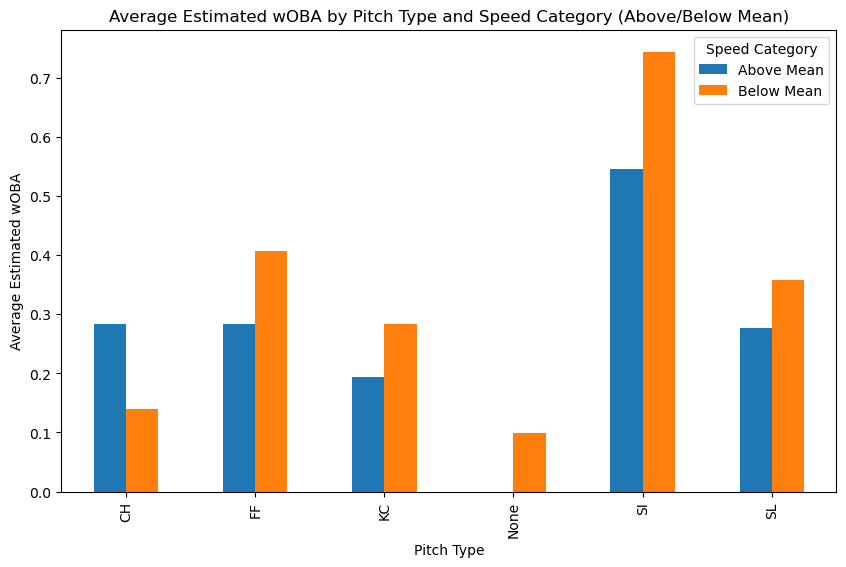

In [34]:
# Step 1: Calculate mean release speed for each pitch type
pitch_type_means = pitcher_data.groupby("pitch_type")["release_speed"].transform("mean")

# Step 2: Create a new column indicating if the speed is above or below the pitch type mean
pitcher_data["speed_category"] = pitcher_data["release_speed"] > pitch_type_means
pitcher_data["speed_category"] = pitcher_data["speed_category"].replace({True: "Above Mean", False: "Below Mean"})

# Step 3: Group by both pitch_type and speed_category, then calculate mean estimated wOBA
woba_by_pitch_speed = pitcher_data.groupby(["pitch_type", "speed_category"])["estimated_woba_using_speedangle"].mean().unstack()

# Step 4: Plot the results
woba_by_pitch_speed.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Pitch Type")
plt.ylabel("Average Estimated wOBA")
plt.title("Average Estimated wOBA by Pitch Type and Speed Category (Above/Below Mean)")
plt.legend(title="Speed Category")
plt.show()


In [35]:
fastball_data = pitcher_data[pitcher_data['pitch_type'] == 'FF'].copy()
fastball_data.columns

Index(['at_bat_number', 'away_score', 'away_team', 'ax', 'ay', 'az',
       'babip_value', 'balls', 'bat_score', 'bat_speed', 'batter', 'bb_type',
       'delta_home_win_exp', 'delta_run_exp', 'des', 'description',
       'effective_speed', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'events', 'fielder_2', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'fld_score', 'game_date', 'game_pk', 'game_type',
       'game_year', 'hc_x', 'hc_y', 'hit_distance_sc', 'hit_location',
       'home_score', 'home_team', 'if_fielding_alignment', 'inning',
       'inning_topbot', 'iso_value', 'launch_angle', 'launch_speed',
       'launch_speed_angle', 'of_fielding_alignment', 'on_1b', 'on_2b',
       'on_3b', 'outs_when_up', 'p_throws', 'pfx_x', 'pfx_z', 'pitch_name',
       'pitch_number', 'pitch_type', 'pitcher', 'plate_x', 'plate_z',
       'player_name', 'post_away_score', 'post_bat_score', 'post_fld_score',
  

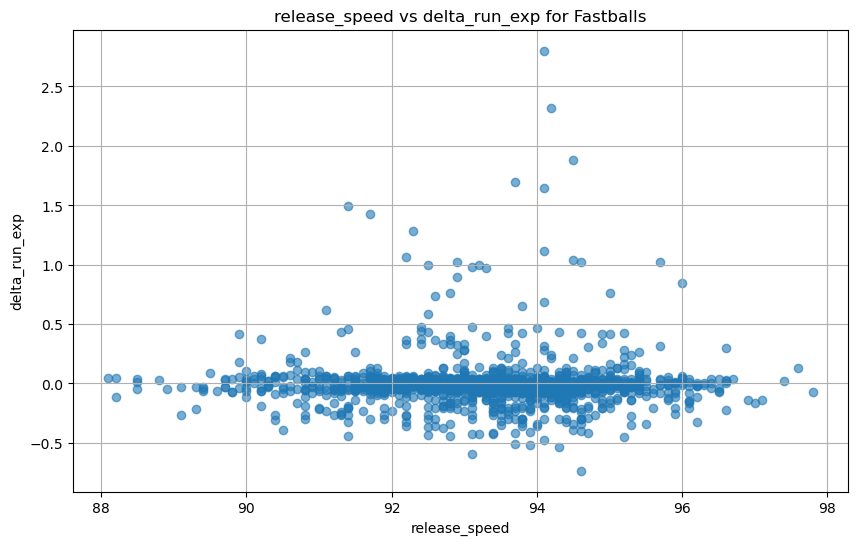

In [36]:
# Define the x and y columns you'd like to plot
x_column = 'release_speed'  # Choose a column name from fastball_data.columns for x-axis
y_column = 'delta_run_exp'  # Choose a column name from fastball_data.columns for y-axis

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(fastball_data[x_column], fastball_data[y_column], alpha=0.6)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column} for Fastballs')
plt.grid(True)
plt.show()

### Change-Point Detection via CUSUM

In [37]:
x_column = 'release_speed'
y_column = 'delta_run_exp'

# Sort fastball_data by release_speed
fastball_data_sorted = fastball_data.sort_values(by=x_column).reset_index(drop=True)
fastball_data_sorted.columns

Index(['at_bat_number', 'away_score', 'away_team', 'ax', 'ay', 'az',
       'babip_value', 'balls', 'bat_score', 'bat_speed', 'batter', 'bb_type',
       'delta_home_win_exp', 'delta_run_exp', 'des', 'description',
       'effective_speed', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'events', 'fielder_2', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'fld_score', 'game_date', 'game_pk', 'game_type',
       'game_year', 'hc_x', 'hc_y', 'hit_distance_sc', 'hit_location',
       'home_score', 'home_team', 'if_fielding_alignment', 'inning',
       'inning_topbot', 'iso_value', 'launch_angle', 'launch_speed',
       'launch_speed_angle', 'of_fielding_alignment', 'on_1b', 'on_2b',
       'on_3b', 'outs_when_up', 'p_throws', 'pfx_x', 'pfx_z', 'pitch_name',
       'pitch_number', 'pitch_type', 'pitcher', 'plate_x', 'plate_z',
       'player_name', 'post_away_score', 'post_bat_score', 'post_fld_score',
  

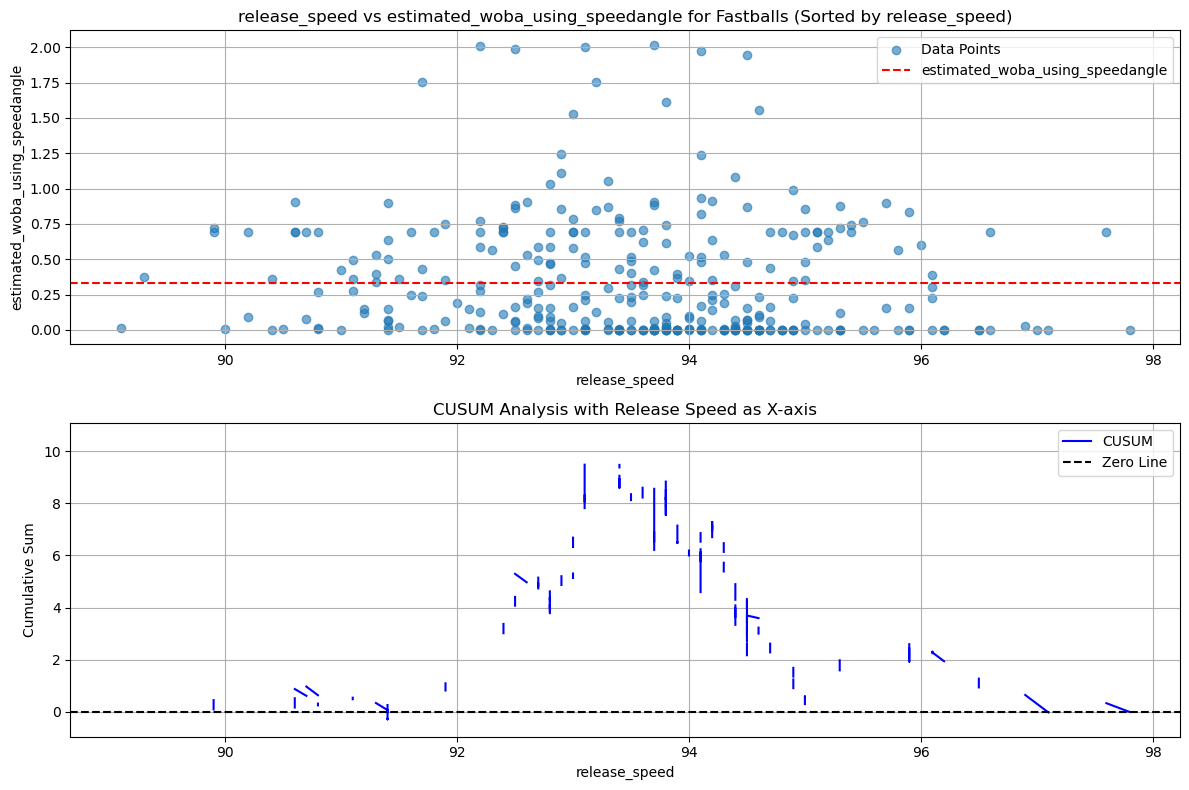

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and y columns
x_column = 'release_speed'
y_column = 'estimated_woba_using_speedangle'

# Sort fastball_data by release_speed
fastball_data_sorted = fastball_data.sort_values(by=x_column).reset_index(drop=True)

# Extract the sorted columns
x_data = fastball_data_sorted[x_column]
y_data = fastball_data_sorted[y_column]

# Compute the target value (mean or baseline for wOBA)
target = y_data.mean()
# y_data.mean()

# Compute deviations from the target
deviations = y_data - target

# Calculate the CUSUM
cusum = np.cumsum(deviations)

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, alpha=0.6, label='Data Points')
plt.axhline(target, color='red', linestyle='--', label=y_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column} for Fastballs (Sorted by {x_column})')
plt.legend()
plt.grid(True)

# Plot the CUSUM with release_speed as the x-axis
plt.subplot(2, 1, 2)
plt.plot(x_data, cusum, label='CUSUM', color='blue')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')
plt.xlabel(x_column)
plt.ylabel('Cumulative Sum')
plt.title('CUSUM Analysis with Release Speed as X-axis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


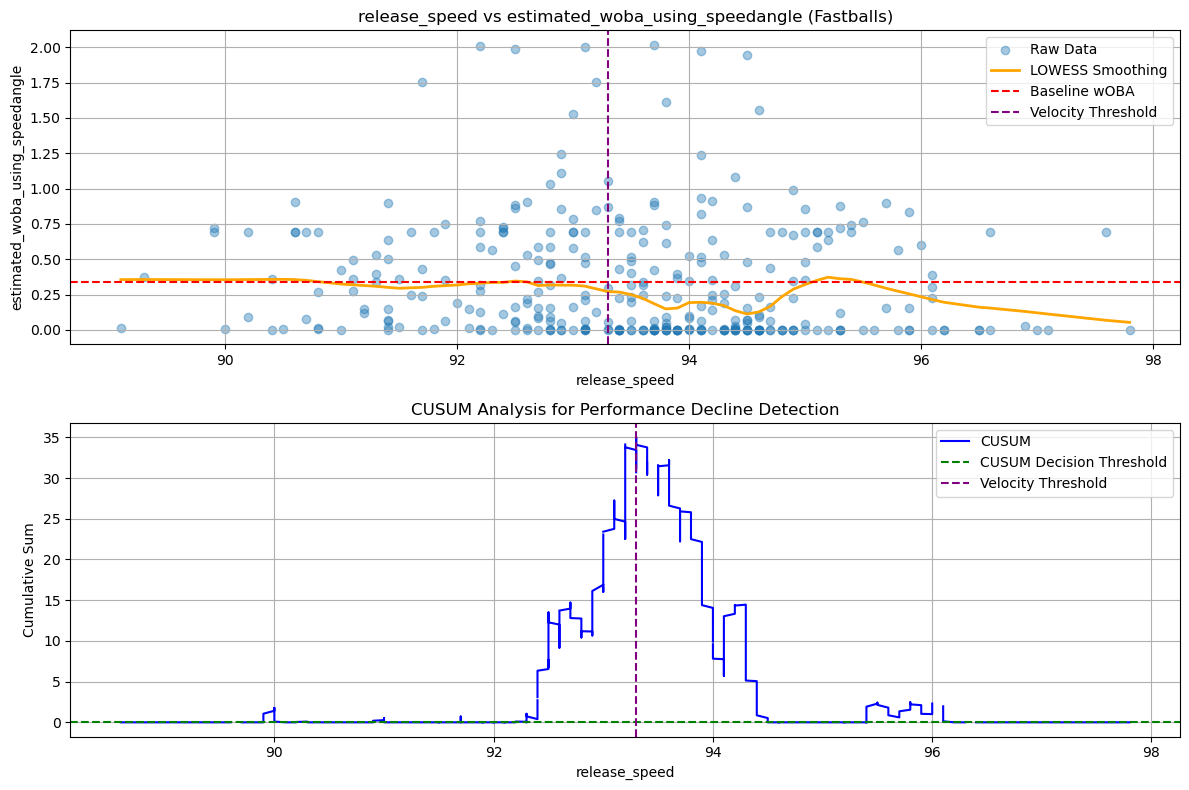

Detected performance decline at velocity: 93.3 mph


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import pandas
from patsy import dmatrices

# Define x and y columns
x_column = 'release_speed'
y_column = 'estimated_woba_using_speedangle'

# Sort fastball_data by release_speed
fastball_data_sorted = fastball_data.sort_values(by=x_column).reset_index(drop=True)

# Extract the sorted columns
x_data = fastball_data_sorted[x_column]
y_data = fastball_data_sorted[y_column]

# Compute a rolling mean to smooth fluctuations (window size can be adjusted)
window_size = 10  # Adjust based on data density
y_smoothed = y_data.rolling(window=window_size, center=True, min_periods=1).mean()

# Compute the target value (mean or baseline for wOBA)
target = y_smoothed.mean()

# Compute deviations from the target
deviations = y_smoothed - target

# Set CUSUM sensitivity parameters
k = 0.005  # Drift parameter to filter small variations
h = 0.02   # Decision threshold for significant change

# Compute CUSUM with one-sided detection
cusum = np.maximum(0, np.cumsum(deviations - k))

# Identify the point of maximum deviation (performance threshold)
threshold_idx = np.argmax(cusum)  # Index where cumulative deviation is largest
velocity_threshold = x_data.iloc[threshold_idx]  # Critical velocity

# Apply LOWESS smoothing for visualization
lowess_frac = 0.2  # Adjust smoothing strength
lowess_fit = lowess(y_data, x_data, frac=lowess_frac)
x_lowess, y_lowess = zip(*lowess_fit)

# Plot the scatter plot with LOWESS smoothing
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, alpha=0.4, label='Raw Data')
plt.plot(x_lowess, y_lowess, color='orange', linewidth=2, label='LOWESS Smoothing')
plt.axhline(target, color='red', linestyle='--', label='Baseline wOBA')
plt.axvline(velocity_threshold, color='purple', linestyle='--', label='Velocity Threshold')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column} (Fastballs)')
plt.legend()
plt.grid(True)

# Plot the CUSUM analysis
plt.subplot(2, 1, 2)
plt.plot(x_data, cusum, label='CUSUM', color='blue')
plt.axhline(h, color='green', linestyle='--', label='CUSUM Decision Threshold')
plt.axvline(velocity_threshold, color='purple', linestyle='--', label='Velocity Threshold')
plt.xlabel(x_column)
plt.ylabel('Cumulative Sum')
plt.title('CUSUM Analysis for Performance Decline Detection')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Detected performance decline at velocity: {velocity_threshold} mph")


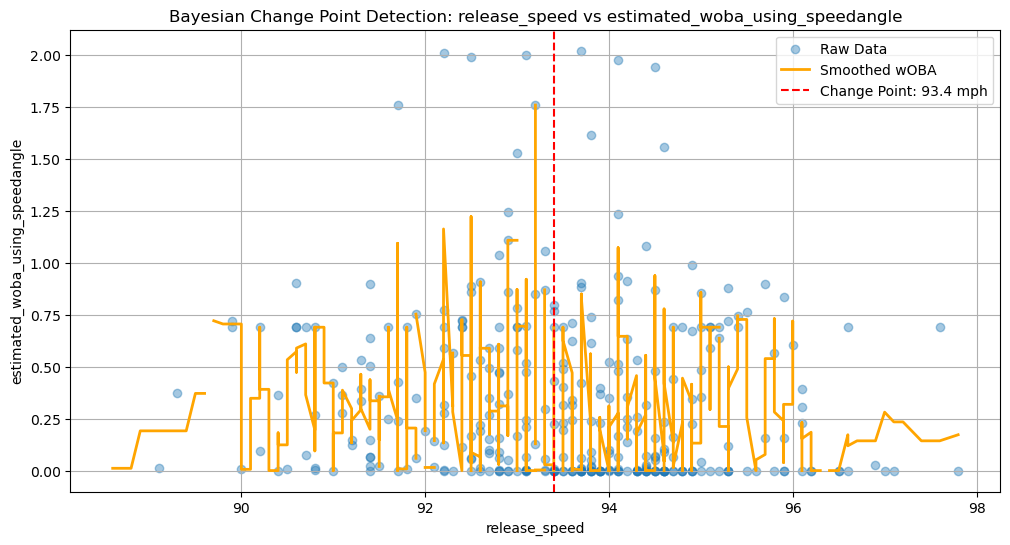

Detected velocity change point: 93.4 mph


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define x and y columns
x_column = 'release_speed'
y_column = 'estimated_woba_using_speedangle'

# Sort fastball_data by release_speed
fastball_data_sorted = fastball_data.sort_values(by=x_column).reset_index(drop=True)

# Extract sorted columns
x_data = fastball_data_sorted[x_column].values
y_data = fastball_data_sorted[y_column].values

# Smooth fluctuations with a rolling mean
window_size = 10
y_smoothed = pd.Series(y_data).rolling(window=window_size, center=True, min_periods=1).mean()

# Bayesian Changepoint Model
def log_likelihood(y, mu1, mu2, sigma, cp):
    """Compute log-likelihood given a change point"""
    n1, n2 = cp, len(y) - cp
    log_lik1 = np.sum(stats.norm.logpdf(y[:n1], mu1, sigma))
    log_lik2 = np.sum(stats.norm.logpdf(y[n1:], mu2, sigma))
    return log_lik1 + log_lik2

def bayesian_changepoint(y, n_samples=5000):
    """Use MCMC to estimate change point"""
    n = len(y)
    cp_samples = []
    mu1_samples = []
    mu2_samples = []
    
    # Initialize parameters
    cp = n // 2
    mu1, mu2 = np.mean(y[:cp]), np.mean(y[cp:])
    sigma = np.std(y)
    
    for _ in range(n_samples):
        # Propose new changepoint
        cp_new = np.random.randint(5, n-5)  # Avoid edges
        
        # Compute likelihoods
        mu1_new, mu2_new = np.mean(y[:cp_new]), np.mean(y[cp_new:])
        log_lik_old = log_likelihood(y, mu1, mu2, sigma, cp)
        log_lik_new = log_likelihood(y, mu1_new, mu2_new, sigma, cp_new)
        
        # Compute acceptance probability
        alpha = np.exp(log_lik_new - log_lik_old)
        if np.random.rand() < alpha:
            cp = cp_new
            mu1, mu2 = mu1_new, mu2_new
        
        cp_samples.append(cp)
        mu1_samples.append(mu1)
        mu2_samples.append(mu2)
    
    # Return most frequent change point
    return np.bincount(cp_samples).argmax()

# Run Bayesian changepoint detection
change_point_index = bayesian_changepoint(y_smoothed)
change_point_value = x_data[change_point_index]

# Plot results
plt.figure(figsize=(12, 6))

# Plot original data and smoothed trend
plt.scatter(x_data, y_data, alpha=0.4, label='Raw Data')
plt.plot(x_data, y_smoothed, color='orange', linewidth=2, label='Smoothed wOBA')

# Overlay detected change point
plt.axvline(change_point_value, color='red', linestyle='--', label=f'Change Point: {change_point_value:.1f} mph')

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Bayesian Change Point Detection: {x_column} vs {y_column}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected velocity change point: {change_point_value:.1f} mph")

In [41]:
# Define x and y columns
x_column = 'release_speed'
y_column = 'estimated_woba_using_speedangle'

# Sort and extract data
fastball_data_sorted = fastball_data.sort_values(by=x_column).reset_index(drop=True)
fastball_data_sorted

,at_bat_number,away_score,away_team,ax,ay,az,babip_value,balls,bat_score,bat_speed,...,umpire,vx0,vy0,vz0,woba_denom,woba_value,zone,batter_name,pitcher_name,speed_category
0,44,0,STL,-3.352073,26.994446,-23.441839,NaN,0,0,NaN,...,NaN,3.716384,-128.311610,-0.187400,NaN,NaN,11,Paul Goldschmidt,Jack Flaherty,Below Mean
1,52,10,DET,-6.655782,25.399282,-21.940226,NaN,0,0,78.0,...,NaN,5.781695,-128.355662,-4.486836,NaN,NaN,4,José Altuve,Jack Flaherty,Below Mean
2,39,3,LAD,-8.662452,24.776436,-19.749046,NaN,1,1,NaN,...,NaN,4.666959,-128.373701,-3.819041,NaN,NaN,13,Eugenio Suárez,Jack Flaherty,Below Mean
3,41,7,LAD,-7.056919,27.650524,-15.829535,NaN,0,1,NaN,...,NaN,3.931290,-128.838334,-2.944803,NaN,NaN,11,Otto Lopez,Jack Flaherty,Below Mean
4,28,2,SD,-7.030329,24.999115,-17.310379,NaN,0,2,NaN,...,NaN,5.594961,-128.727908,-4.844133,NaN,NaN,7,Xander Bogaerts,Jack Flaherty,Below Mean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,8,0,STL,-5.766653,32.993742,-11.898731,0.0,2,0,72.3,...,NaN,8.954592,-141.051462,-5.093726,1.0,0.0,12,Paul Goldschmidt,Jack Flaherty,Above Mean
1380,32,0,PHI,-6.196783,30.167500,-18.274600,0.0,1,0,NaN,...,NaN,7.187065,-141.447137,-2.486883,NaN,0.0,11,Cal Stevenson,Jack Flaherty,Above Mean
1381,20,0,STL,-4.039236,25.155156,-15.271404,NaN,0,0,NaN,...,NaN,10.087685,-141.509534,-7.468394,NaN,NaN,14,Willson Contreras,Jack Flaherty,Above Mean
1382,8,1,DET,-7.944394,32.995478,-13.054865,0.0,3,0,NaN,...,NaN,10.455177,-141.583075,-6.599234,1.0,0.7,14,Josh Naylor,Jack Flaherty,Above Mean


In [42]:
pitcher_data.columns

Index(['at_bat_number', 'away_score', 'away_team', 'ax', 'ay', 'az',
       'babip_value', 'balls', 'bat_score', 'bat_speed', 'batter', 'bb_type',
       'delta_home_win_exp', 'delta_run_exp', 'des', 'description',
       'effective_speed', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'events', 'fielder_2', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'fld_score', 'game_date', 'game_pk', 'game_type',
       'game_year', 'hc_x', 'hc_y', 'hit_distance_sc', 'hit_location',
       'home_score', 'home_team', 'if_fielding_alignment', 'inning',
       'inning_topbot', 'iso_value', 'launch_angle', 'launch_speed',
       'launch_speed_angle', 'of_fielding_alignment', 'on_1b', 'on_2b',
       'on_3b', 'outs_when_up', 'p_throws', 'pfx_x', 'pfx_z', 'pitch_name',
       'pitch_number', 'pitch_type', 'pitcher', 'plate_x', 'plate_z',
       'player_name', 'post_away_score', 'post_bat_score', 'post_fld_score',
  

In [43]:
def add_time_and_event_metrics(df):
    """
    This function adds the 'time' and 'event' columns to the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with chronological order sorted by pitch number.
    
    Returns:
    pd.DataFrame: The DataFrame with the 'time' and 'event' columns added.
    """
    df['time'] = np.arange(1, len(df) + 1)

    df['event'] = (df['post_bat_score'] - df['bat_score'] > 0).astype(int)

    return df


In [44]:
import pandas as pd
print(pd.__version__)

2.2.2


In [45]:
# Sort the entire data by game_date
pitcher_data_sorted = pitcher_data.sort_values(by='game_date')

# Group by 'game_date' and then sort each group by 'pitch_number'
grouped_data = pitcher_data_sorted.groupby('game_date')

# Create a dictionary to store separate DataFrames for each game_date
game_date_dfs = {
    game_date: add_time_and_event_metrics(
        group.sort_values(by=['at_bat_number', 'pitch_number'], ascending=[True, True])
    )
    for game_date, group in grouped_data
}

In [50]:
# Access and display the DataFrame for '2024-03-19'
import pandas as pd

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Now display the DataFrame
display(game_date_dfs[pd.Timestamp('2024-09-14 00:00:00')])

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')


,at_bat_number,away_score,away_team,ax,ay,az,babip_value,balls,bat_score,bat_speed,...,vy0,vz0,woba_denom,woba_value,zone,batter_name,pitcher_name,speed_category,time,event
666,4,0,LAD,-8.444247,25.940795,-13.323677,NaN,0,0,NaN,...,-136.565590,-10.383543,NaN,NaN,14,Michael Harris,Jack Flaherty,Above Mean,1,0
665,4,0,LAD,-8.883660,25.139916,-14.739076,NaN,1,0,NaN,...,-134.234456,-6.132745,NaN,NaN,13,Michael Harris,Jack Flaherty,Below Mean,2,0
664,4,0,LAD,-5.561714,24.764941,-15.323328,NaN,2,0,NaN,...,-133.672193,-5.920075,NaN,NaN,4,Michael Harris,Jack Flaherty,Below Mean,3,0
663,4,0,LAD,4.096549,22.160442,-30.230699,NaN,2,0,NaN,...,-124.409653,-2.024136,NaN,NaN,4,Michael Harris,Jack Flaherty,Above Mean,4,0
662,4,0,LAD,-7.499030,27.749990,-14.277518,1.0,2,0,70.9,...,-136.052013,-5.438696,1.0,0.9,6,Michael Harris,Jack Flaherty,Above Mean,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,30,1,LAD,5.821196,24.172909,-30.641578,NaN,0,4,NaN,...,-124.218945,-2.795290,NaN,NaN,9,Whit Merrifield,Jack Flaherty,Above Mean,79,0
587,30,1,LAD,-6.872167,27.761443,-13.578268,NaN,0,4,55.1,...,-136.552875,-5.900813,NaN,NaN,14,Whit Merrifield,Jack Flaherty,Above Mean,80,0
586,30,1,LAD,6.299352,21.441785,-38.677401,NaN,0,4,NaN,...,-112.826548,-1.458192,NaN,NaN,14,Whit Merrifield,Jack Flaherty,Below Mean,81,0
585,30,1,LAD,-7.349100,26.861223,-17.399263,NaN,1,4,60.1,...,-135.431683,-5.105396,NaN,NaN,5,Whit Merrifield,Jack Flaherty,Below Mean,82,0


In [51]:
%pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [68]:
def apply_survival_analysis(df):
    # Ensure 'time', 'event', and 'delta_run_exp' columns are present
    if not all(col in df for col in ['time', 'event', 'delta_run_exp']):
        print(f"Missing required columns in data for game_date {df['game_date'].iloc[0]}")
        return

    # Convert 'time' to numeric, forcing errors to NaN
    df['time'] = pd.to_numeric(df['time'], errors='coerce')
    # Convert 'event' to integer, forcing errors to NaN (in case of invalid values)
    df['event'] = pd.to_numeric(df['event'], errors='coerce').astype(int, errors='ignore')
    # Ensure 'delta_run_exp' is numeric (it is part of the Cox model)
    df['delta_run_exp'] = pd.to_numeric(df['delta_run_exp'], errors='coerce')

    # Drop rows with missing or invalid values
    df = df.dropna(subset=['time', 'event', 'delta_run_exp'])

    # Check if 'time' and 'event' are numeric and not empty
    if df[['time', 'event', 'delta_run_exp']].isna().sum().sum() > 0:
        print(f"Skipping game_date {df['game_date'].iloc[0]} due to missing values.")
        return

    # 1. Kaplan-Meier Curve (Survival Function)
    kmf = KaplanMeierFitter()

    # Fit the Kaplan-Meier model
    kmf.fit(durations=df['time'], event_observed=df['event'])

    # Plot the Kaplan-Meier curve
    plt.figure(figsize=(10, 6))
    kmf.plot_survival_function()
    plt.title(f'Kaplan-Meier Curve for Pitcher Events on {df["game_date"].iloc[0]}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.show()

    # 2. Cox Proportional Hazards Model
    # Create the Cox model
    cph = CoxPHFitter()

    # Fit the Cox model, using 'delta_run_exp' as a covariate
    cph.fit(df[['time', 'event', 'delta_run_exp']], duration_col='time', event_col='event')

    # Display the results
    print(f"Cox Proportional Hazards Model Summary for {df['game_date'].iloc[0]}:")
    cph.print_summary()

    # Make predictions (optional)
    predicted_hazard = cph.predict_partial_hazard(df[['delta_run_exp']])

    # Visualize the effect of 'delta_run_exp' on hazard
    plt.figure(figsize=(10, 6))
    plt.plot(df['delta_run_exp'], predicted_hazard, label='Predicted Hazard')
    plt.title(f'Effect of Delta Run Expectancy on Hazard for {df["game_date"].iloc[0]}')
    plt.xlabel('Delta Run Expectancy')
    plt.ylabel('Predicted Hazard')
    plt.legend()
    plt.show()

# Apply the survival analysis to every DataFrame in game_date_dfs
for game_date, df in game_date_dfs.items():
    apply_survival_analysis(df)


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

Analyzing data for game date: 2024-03-19 00:00:00
Interrupted Time-Series Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:             woba_value   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 01 Feb 2025   Prob (F-statistic):                nan
Time:                        07:49:59   Log-Likelihood:                -7.9099
No. Observations:                  19   AIC:                             17.82
Df Residuals:                      18   BIC:                             18.76
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


ValueError: x and y must have same first dimension, but have shapes (69,) and (19,)

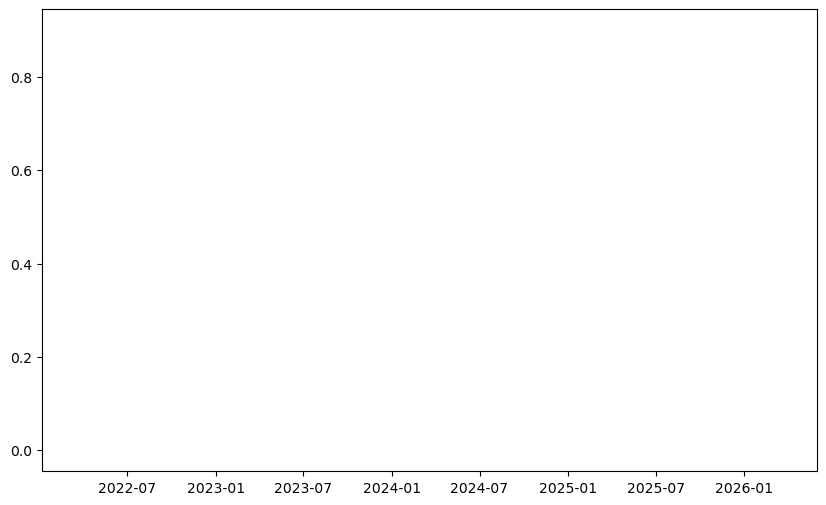

In [70]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def interrupted_time_series_analysis(data, intervention_date='2023-04-01'):
    """
    Performs Interrupted Time-Series Analysis (ITSA) and ARIMA on the given dataset.
    
    Parameters:
    - data: DataFrame with the time-series data.
    - intervention_date: The date when the intervention occurred (default: '2023-04-01').
    
    Returns:
    - ITSA model summary and ARIMA model summary for both pre- and post-intervention periods.
    """
    # Ensure 'game_date' is a datetime index
    data['game_date'] = pd.to_datetime(data['game_date'])
    
    # Create a column to indicate time after the intervention
    data['after_intervention'] = (data['game_date'] >= intervention_date).astype(int)
    
    # Fit a linear regression model (performance_metric ~ game_date + after_intervention)
    model = ols('woba_value ~ game_date + after_intervention', data=data).fit()  # Replace 'woba_value' with the metric you want to analyze
    
    # Summarize the regression results for ITSA
    print("Interrupted Time-Series Analysis Summary:")
    print(model.summary())
    
    # Plot the results of ITSA
    plt.figure(figsize=(10, 6))
    plt.plot(data['game_date'], data['woba_value'], label='wOBA Value')  # Replace with your metric column
    plt.plot(data['game_date'], model.fittedvalues, label='Fitted Model', color='orange')
    plt.axvline(x=intervention_date, color='r', linestyle='--', label='Velocity Drop Point')
    plt.xlabel('Time')
    plt.ylabel('wOBA Value')
    plt.title('Interrupted Time-Series Analysis')
    plt.legend()
    plt.show()

    # ARIMA Model for Time-Series Forecasting
    # Set game_date as index
    data.set_index('game_date', inplace=True)
    
    # Perform ADF test to check stationarity
    result = adfuller(data['woba_value'].dropna())  # Replace with the metric column
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")

    # If p-value > 0.05, difference the data
    data['woba_value_diff'] = data['woba_value'].diff().dropna()

    # Check ACF and PACF plots to decide on ARIMA(p, d, q) parameters
    plt.figure(figsize=(10, 6))
    plot_acf(data['woba_value_diff'].dropna(), lags=20)
    plt.show()

    plt.figure(figsize=(10, 6))
    plot_pacf(data['woba_value_diff'].dropna(), lags=20)
    plt.show()

    # Fit ARIMA model (example with ARIMA(1, 1, 1), you can adjust p, d, q based on ACF/PACF)
    model_arima = ARIMA(data['woba_value'], order=(1, 1, 1))  # Adjust p, d, q as needed
    arima_result = model_arima.fit()

    # Print the ARIMA model summary
    print("ARIMA Model Summary:")
    print(arima_result.summary())

    # Forecast the next 10 periods (you can adjust this)
    forecast = arima_result.forecast(steps=10)

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['woba_value'], label='Historical Data')
    plt.plot(pd.date_range(data.index[-1], periods=11, freq='D')[1:], forecast, label='Forecast', color='red')
    plt.xlabel('Time')
    plt.ylabel('wOBA Value')
    plt.title('ARIMA Forecast for wOBA Value')
    plt.legend()
    plt.show()

    # 3. Segment Pre- and Post-Intervention for ARIMA
    pre_intervention_data = data[data.index < intervention_date]
    post_intervention_data = data[data.index >= intervention_date]

    # Fit ARIMA models for both pre- and post-intervention periods
    pre_arima_model = ARIMA(pre_intervention_data['woba_value'], order=(1, 1, 1))
    pre_arima_result = pre_arima_model.fit()

    post_arima_model = ARIMA(post_intervention_data['woba_value'], order=(1, 1, 1))
    post_arima_result = post_arima_model.fit()

    # Print the ARIMA results for both segments
    print("Pre-Intervention ARIMA Summary:")
    print(pre_arima_result.summary())

    print("Post-Intervention ARIMA Summary:")
    print(post_arima_result.summary())

# Loop through all game dataframes and apply the function
for game_date, game_df in game_date_dfs.items():
    print(f"Analyzing data for game date: {game_date}")
    interrupted_time_series_analysis(game_df, intervention_date='2024-02-15')
